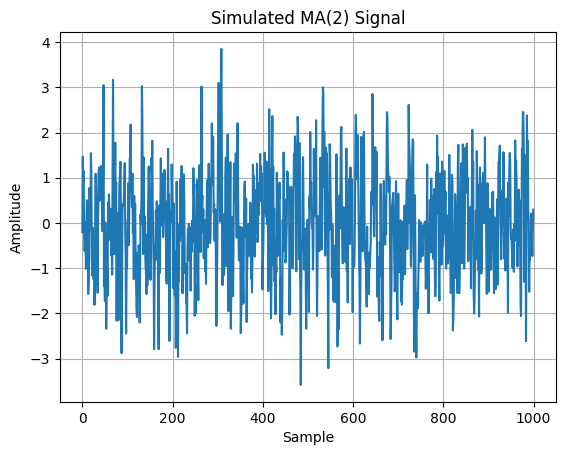


--- MA(2) Model Fit Summary ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1410.326
Date:                Mon, 26 May 2025   AIC                           2828.652
Time:                        14:15:59   BIC                           2848.283
Sample:                             0   HQIC                          2836.113
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0559      0.057     -0.981      0.327      -0.168       0.056
ma.L1          0.5352      0.029     18.219      0.000       0.478       0.593
ma.L2          0.27

<Figure size 1000x400 with 0 Axes>

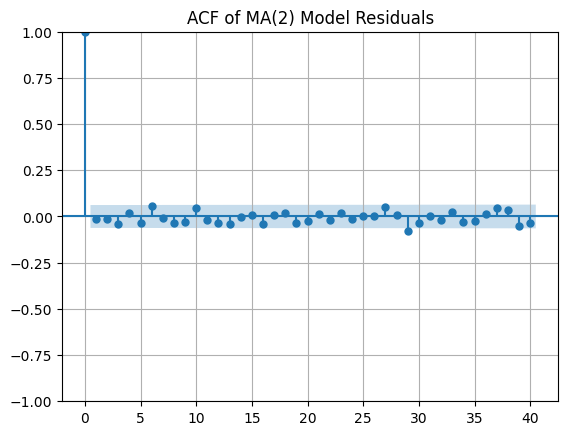


--- AR(2) Model Fit Summary ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1422.437
Date:                Mon, 26 May 2025   AIC                           2852.874
Time:                        14:15:59   BIC                           2872.505
Sample:                             0   HQIC                          2860.335
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0559      0.057     -0.987      0.323      -0.167       0.055
ar.L1          0.5171      0.032     16.379      0.000       0.455       0.579
ar.L2         -0.07

<Figure size 1000x400 with 0 Axes>

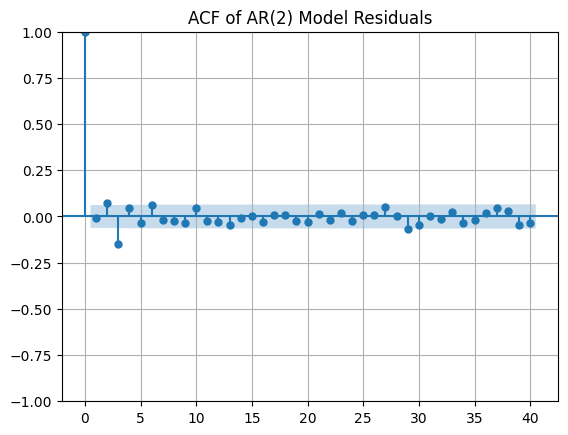

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf # Required for ACF plots

# Parameters
N = 1000
# Generate white Gaussian noise
white_noise = np.random.normal(loc=0.0, scale=1.0, size=N)

# MA coefficients
b = np.array([1.0, 0.5, 0.25])
a = np.array([1.0]) # Denominator for MA simulation with lfilter is [1]

ma2_signal = lfilter(b, a, white_noise)

plt.plot(ma2_signal)
plt.title("Simulated MA(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Fit MA(2) model
model_ma2_fit = ARIMA(ma2_signal, order=(0, 0, 2)).fit()
print("\n--- MA(2) Model Fit Summary ---")
print(model_ma2_fit.summary())

# Plot residuals ACF for MA(2) model
plt.figure(figsize=(10, 4))
plot_acf(model_ma2_fit.resid, lags=40, title='ACF of MA(2) Model Residuals')
plt.grid(True)
plt.show()

# Fit AR(2) model
model_ar2_fit = ARIMA(ma2_signal, order=(2, 0, 0)).fit()
print("\n--- AR(2) Model Fit Summary ---")
print(model_ar2_fit.summary())

# Plot residuals ACF for AR(2) model
plt.figure(figsize=(10, 4))
plot_acf(model_ar2_fit.resid, lags=40, title='ACF of AR(2) Model Residuals')
plt.grid(True)
plt.show()